In [1]:
# importing libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

C:\Users\aravi\AppData\Local\Temp/ipykernel_14636/3079495074.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# importing data 

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

## EDA

In [3]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [4]:
train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [5]:
train.shape

(89197, 10)

In [6]:
train.profession.value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

In [7]:
train.gender.value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

In [8]:
len(train.category_id.value_counts())

47

In [9]:
def hist(column):
    """ This function helps to visulaize the histogram of the repective column """
    
    train[column].hist()
    plt.axvline(x = train[column].mean(), color = 'red', label = 'Mean')
    plt.axvline(x = train[column].median(), color = 'orange', label = 'Median')
    plt.axvline(x = train[column].mode()[0], color = 'pink', label = 'Mode')
    plt.xticks(color = 'green')
    plt.yticks(color = 'red')
    plt.title(f"{column}_Distribution", color = 'yellow')
    plt.legend()
    plt.grid(color = 'grey');

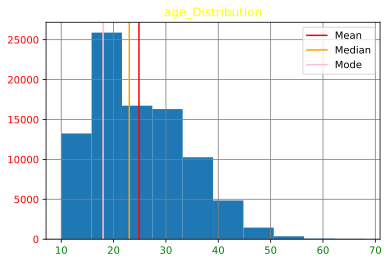

In [10]:
# Let's see the distribution for age 

hist('age')

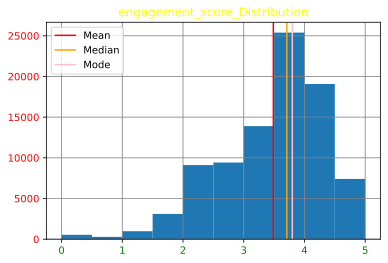

In [11]:
hist('engagement_score')

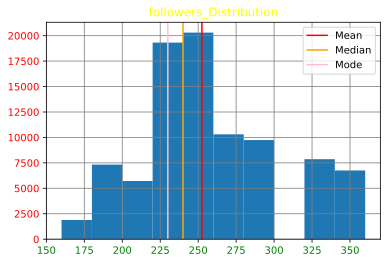

In [12]:
hist('followers')

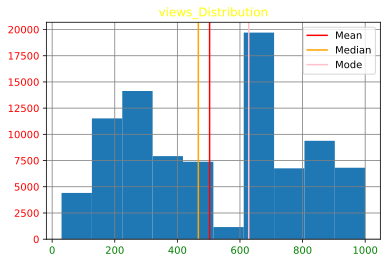

In [13]:
hist('views')

In [14]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


### Observations: 
* I don't see much oultiers here and some of the features following normal distributions and some of them are not following the normal distribution. 
* We, can scale our data with **Min Max Scaler** coz all are different distributions. 
* No null values also. 
* Let's imputate the categorical values. 


In [15]:
# let's encode the data: 

dic = {'Male':0, 'Female':1}
train['gender'] = train['gender'].map(dic)

train['profession'] = label_encoder.fit_transform(train['profession'])

In [16]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,0,1,180,1000,4.33
1,2,5304,32,132,14,1,1,330,714,1.79
2,3,1840,12,24,19,0,1,180,138,4.35
3,4,12597,23,112,19,0,1,220,613,3.77
4,5,13626,23,112,27,0,2,220,613,3.13


In [17]:
# let's seprate the data... 

x = train.drop(['row_id', 'user_id', 'engagement_score'], axis = 1)
y = train.engagement_score

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .3)

In [18]:
# let's scale the values 

scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [19]:
# let's visualize this.. 

xtrain = pd.DataFrame(xtrain, columns = x.columns)
xtest = pd.DataFrame(xtest, columns = x.columns)

In [20]:
xtrain

,category_id,video_id,age,gender,profession,followers,views
0,0.086957,0.051724,0.448276,1.0,0.0,0.40,0.205155
1,0.217391,0.229885,0.448276,0.0,0.0,0.45,0.154639
2,0.673913,0.752874,0.258621,0.0,0.0,0.85,0.705155
3,0.478261,0.637931,0.517241,0.0,0.0,0.30,0.601031
4,0.043478,0.022989,0.396552,0.0,0.0,0.55,0.609278
...,...,...,...,...,...,...,...
62432,0.608696,0.465517,0.189655,0.0,0.5,0.50,0.022680
62433,0.652174,0.873563,0.086207,0.0,0.5,0.35,0.129897
62434,0.695652,0.528736,0.310345,0.0,0.0,0.55,0.857732
62435,0.217391,0.120690,0.155172,1.0,1.0,0.45,0.154639


Our data is changed between 0 to 1 


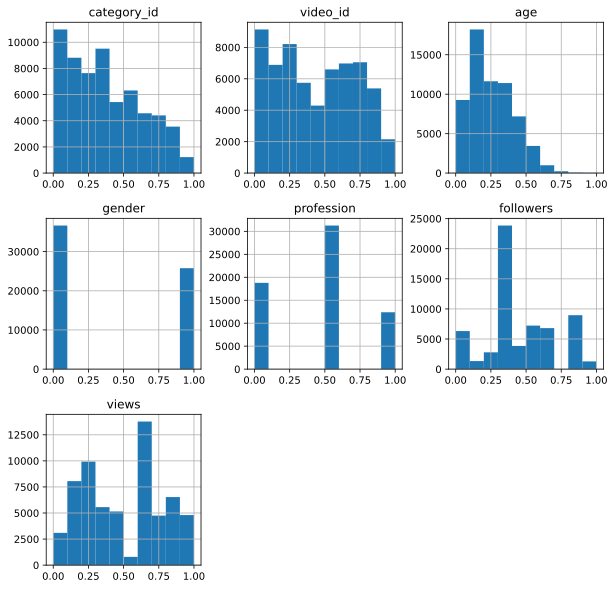

In [21]:

xtrain.hist(figsize = (10,10));
plt.title([x.columns], color = 'yellow')
# plt.xticks(color = 'green')
# plt.yticks(color = 'red')
print('Our data is changed between 0 to 1 ')

### Observations:
* Our data is well scaled now. 
* Imputed the values. 
* No outliers, No missing values. 
* Our Data is now **clean!**. 
* Let's build the model!

In [34]:
# Linear Regression! 

from sklearn.linear_model import LinearRegression 
lr = LinearRegression().fit(xtrain, ytrain)
pred = lr.predict(xtest)
print(f'Your R2: {r2_score(ytest, pred)}')

Your R2: 0.23569876944920864


Linear guy is bad!

In [33]:
# XG Booster :)))))))))

from xgboost import XGBRegressor
regressor = XGBRegressor().fit(xtrain,ytrain)
pred = regressor.predict(xtest)
print(f'Your R2: {r2_score(ytest, pred)}')

Your R2: 0.34793587400487447


Let's do some hyperparameter tunning to get rid away from this negative value ... .. . 

In [24]:
# Let select some parameters 

params = { 'learning_rate': ['0.05', '0.01', '0.09', '0.09', '0.001'], 
          'max_depth': [3, 4, 5, 8, 9, 12, 19, 1, ], # 
          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05], 
          'colsample_bytree': [0.3, 0.4, 0.5, 0.8]}

random = RandomizedSearchCV(regressor, param_distributions= params, n_iter= 5, scoring = 'r2', cv =5, verbose = 3)


In [25]:
random.fit(x, y)
""" Run this code, commented due to long output"""

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.05, max_depth=5;, score=0.362 total time=   1.1s
[CV 2/5] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.05, max_depth=5;, score=0.349 total time=   1.3s
[CV 3/5] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.05, max_depth=5;, score=0.349 total time=   1.2s
[CV 4/5] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.05, max_depth=5;, score=0.346 total time=   1.2s
[CV 5/5] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.05, max_depth=5;, score=0.344 total time=   1.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.001, max_depth=12;, score=-9.812 total time=   1.9s
[CV 2/5] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.001, max_depth=12;, score=-9.813 total time=   1.9s
[CV 3/5] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.001, max_depth=12;, score=-9.993 total time=   2.1s
[CV 4/5] END colsample_bytree=0.3, 

' Run this code, commented due to long output'

In [26]:
random.best_params_

{'max_depth': 5,
 'learning_rate': '0.09',
 'gamma': 0.05,
 'colsample_bytree': 0.5}

In [32]:
cl = XGBRegressor(colsample_bytree=0.8, gamma=0.02, learning_rate='0.09',max_depth=8)
cl.fit(xtrain,ytrain)
pred = cl.predict(xtest)
print(f'Your R2: {r2_score(ytest,pred)}')

Your R2: 0.35441472459947865


#### Run Various models 

In [28]:
#Running various models

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 


models = []
models.append(('Decison', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('GBR',GradientBoostingRegressor())) 
models.append(('RFR',RandomForestRegressor()))

# Gamma controls the over fitting 
import time

# evaluate each model in turn
results = []
names = []
scoring = 'r2'

for name, model in models:
    start_time = time.time()
    model.fit(xtrain, ytrain)

    y_pred = model.predict(xtest)
    predictions = [round(value) for value in y_pred]


    # evaluate predictions
    accuracy = r2_score(ytest, predictions)
    print("r2_socre: %.2f%%" % (accuracy * 100.0),name)
    print("--- %s seconds ---" % (time.time() - start_time))
    

r2_socre: 0.04% Decison
--- 0.2899959087371826 seconds ---
r2_socre: 13.13% KNN
--- 1.3278024196624756 seconds ---
r2_socre: 22.66% GBR
--- 4.827169418334961 seconds ---
r2_socre: 10.85% RFR
--- 15.08345913887024 seconds ---


In [29]:
train.profession.value_counts()

1    44638
0    26840
2    17719
Name: profession, dtype: int64

In [30]:
train.gender.value_counts()

0    52397
1    36800
Name: gender, dtype: int64

<AxesSubplot:>

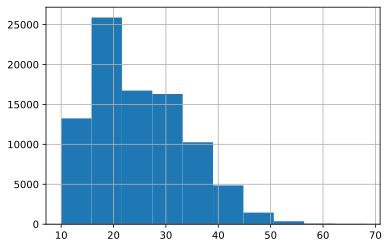

In [31]:
train.age.hist()